<a href="https://colab.research.google.com/github/Maxime-Bakunzi/web_scraping-apis_plg2/blob/main/apis_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping and API Project**

This project demonstrates the use of APIs and web scraping techniques in Python.

1. **APIs**: The Swapi (Star Wars API) is used to retrieve a list of starships that can hold a specified number of passengers. The code handles pagination to fetch all available data from the API, ensuring accurate results for different passenger counts.

2. **Web Scraping**: BeautifulSoup is used to scrape tabular data from a website and save it in CSV format. The project also simulates downloading product images from Amazon by using example URLs, showcasing how product data can be extracted and stored.

The project is structured into API and web scraping components, with results saved in CSV and image formats.

# Setup and Installation


In [96]:
# First, let's install the required packages
!pip install requests beautifulsoup4

import requests
from bs4 import BeautifulSoup
import csv
import time
import os
import random
import pandas as pd

## Part 1: SWAPI API Implementation

In [75]:
# Implementation of the Star Wars API ship passenger capacity checker

def availableShips(passengerCount):
    """
    Returns a list of ships that can hold a given number of passengers

    Args:
        passengerCount (int): The minimum number of passengers the ship should hold

    Returns:
        list: Names of ships that can hold the specified number of passengers
    """
    base_url = "https://swapi.dev/api/starships/"
    ships = []
    page = 1

    while True:
        # Make request to current page
        response = requests.get(f"{base_url}?page={page}")

        # Check if request was successful
        if response.status_code != 200:
            break

        data = response.json()

        # Process each ship in the current page
        for ship in data['results']:
            # Handle cases where passengers field might be 'n/a' or contain commas
            try:
                # Remove commas and convert to integer
                ship_capacity = ship['passengers'].replace(',', '')
                if ship_capacity == 'n/a' or ship_capacity == 'unknown':
                    continue
                ship_capacity = int(ship_capacity)

                # Check if ship meets passenger requirement
                if ship_capacity >= passengerCount:
                    ships.append(ship['name'])
            except ValueError:
                # Skip ships with invalid passenger counts
                continue

        # Check if there are more pages
        if not data.get('next'):
            break

        page += 1

    return ships

### Test the SWAPI implementation

In [76]:
test_passenger_count = 4
ships = availableShips(test_passenger_count)
print(f"Ships that can hold {test_passenger_count} passengers:")
for ship in ships:
    print(f"- {ship}")

Ships that can hold 4 passengers:
- CR90 corvette
- Sentinel-class landing craft
- Death Star
- Millennium Falcon
- Executor
- Rebel transport
- Slave 1
- Imperial shuttle
- EF76 Nebulon-B escort frigate
- Calamari Cruiser
- Republic Cruiser
- Droid control ship
- Scimitar
- J-type diplomatic barge
- AA-9 Coruscant freighter
- Republic Assault ship
- Solar Sailer
- Trade Federation cruiser
- Theta-class T-2c shuttle
- Republic attack cruiser


## Part 2: Web Scraping - Sports Data

In [77]:
# Scraping hockey team data from scrapethissite.com
def scrape_hockey_teams():
  """
  Scrapes hockey team and saves it to a DataFrame.
  """
  base_url = "https://www.scrapethissite.com/pages/forms/"

  # Make request to the webpage
  response = requests.get(base_url)
  soup = BeautifulSoup(response.text, 'html.parser')

  # Find all team rows
  teams = soup.find_all('tr', class_='team')

  # Prepare data list
  team_data = []

  # Extract data for each team
  for team in teams:
    team_info = {
        'Team Name': team.find('td', class_= 'name').text.strip(),
        'Year': team.find('td', class_= 'year').text.strip(),
        'Wins': team.find('td', class_= 'wins').text.strip(),
        'Losses': team.find('td', class_= 'losses').text.strip(),
        'OT Losses': team.find('td', class_= 'ot-losses').text.strip(),
        'Goals For': team.find('td', class_= 'gf').text.strip(),
        'Goals Against': team.find('td', class_= 'ga').text.strip()
    }
    team_data.append(team_info)

  # Convert to DataFrame
  df = pd.DataFrame(team_data)

  # Save to CSV
  df.to_csv('hockey_teams.csv', index=False)

  return df

### Run the scraper and display first few rows

In [78]:
hockey_df = scrape_hockey_teams()
print("\nFirst few rows of hockey team data:")
display(hockey_df.head())


First few rows of hockey team data:


,Team Name,Year,Wins,Losses,OT Losses,Goals For,Goals Against
0,Boston Bruins,1990,44,24,,299,264
1,Buffalo Sabres,1990,31,30,,292,278
2,Calgary Flames,1990,46,26,,344,263
3,Chicago Blackhawks,1990,49,23,,284,211
4,Detroit Red Wings,1990,34,38,,273,298


## Part 3: Web Scraping - Amazon Products


Amazon product scraping results:


,category,title,price,rating,reviews,image_path
0,Automotive,SPI22016 Total Interior Cleaner and Protectant...,11.,4.6 out of 5 stars,0,/content/product_images/automotive_product.jpg
1,Baby Products,"Sensitive Baby Wipes, Water Based, Hypoallerge...",34.,4.8 out of 5 stars,0,/content/product_images/baby_product.jpg
2,Computers,No title available,Price not available,No rating available,0,No image available
3,Electronics,No title available,Price not available,No rating available,0,No image available



Display downloaded product images:

Product Image: s?k=automotive_product.jpg


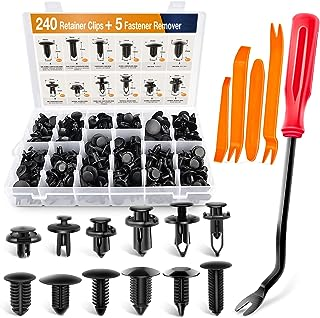


Product Image for Automotive:


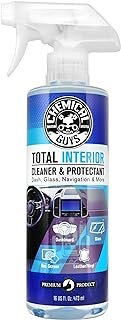


Product Image for Baby Products:


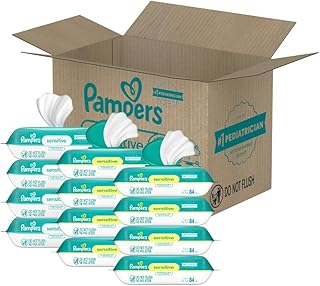


Product Image for Software:


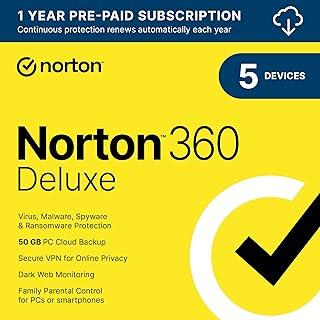

In [95]:
# Define categories dictionary at the module level so it's accessible to all functions
categories = {
    'automotive': {
        'url': '/s?k=automotive',
        'display_name': 'Automotive'
    },
    'baby': {
        'url': '/s?k=baby',
        'display_name': 'Baby Products'
    },
    'computers': {
        'url': '/s?k=computers',
        'display_name': 'Computers'
    },
    'electronics': {
        'url': '/s?k=electronics',
        'display_name': 'Electronics'
    },
    'software': {
        'url': '/s?k=software',
        'display_name': 'Software'
    }
}

def scrape_amazon_products():
    """
    Scrapes products from different categories on Amazon
    """
    # Create directory for images
    from google.colab import files
    if not os.path.exists('/content/product_images'):
        os.makedirs('/content/product_images')

    # Headers to mimic for images in colab
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Connection': 'keep-alive',
        'DNT': '1',  # Do Not Track request header
        'Upgrade-Insecure-Requests': '1',
        'Referer': 'https://www.amazon.com/',  # The URL of the previous page
        'TE': 'Trailers'  # Indicates transfer encoding
    }

    products = []
    for category_key, category_info in categories.items():
        try:
            # Add delay to avoid getting blocked
            time.sleep(random.uniform(1, 3))

            # Make request to category page
            response = requests.get(f"https://www.amazon.com{category_info['url']}", headers=headers)
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find first product in a category
            product = soup.find('div', class_='a-section a-spacing-base')

            if product:
                # Extract additional product information
                title = product.find('span', class_='a-size-base-plus a-color-base a-text-normal')
                title = title.text.strip() if title else 'No title available'

                price = product.find('span', class_='a-price-whole')
                price = price.text.strip() if price else 'Price not available'

                rating = product.find('span', class_='a-icon-alt')
                rating = rating.text.strip() if rating else 'No rating available'

                reviews = product.find('span', {'class': 'a-size-base', 'dir': 'auto'})
                reviews = reviews.text.strip() if reviews else '0'

                img_url = product.find('img', class_='s-image')
                img_url = img_url['src'] if img_url else None

                if img_url:
                    # Download and save image
                    img_response = requests.get(img_url)
                    img_filename = f"/content/product_images/{category_key}_product.jpg"

                    with open(img_filename, 'wb') as img_file:
                        img_file.write(img_response.content)
                else:
                    img_filename = 'No image available'

                products.append({
                    'category': category_info['display_name'],
                    'title': title,
                    'price': price,
                    'rating': rating,
                    'reviews': reviews,
                    'image_path': img_filename
                })

        except Exception as e:
            print(f"Error scraping category {category_key}: {str(e)}")

    # Convert to DataFrame for better visualization in Colab
    products_df = pd.DataFrame(products)
    return products_df

# Run Amazon scraper and display results
print("\nAmazon product scraping results:")
try:
    products_df = scrape_amazon_products()
    display(products_df)
except Exception as e:
    print(f"Error during Amazon scraping: {str(e)}")
    print("Note: Amazon might block automated requests. Consider using an API instead.")

# Displaying Images
from IPython.display import Image, display

def display_product_images():
    """
    Display the downloaded product images in the notebook with category names
    """
    image_dir = '/content/product_images'
    if os.path.exists(image_dir):
        for image_file in os.listdir(image_dir):
            if image_file.endswith('.jpg'):
                category_name = image_file.replace('_product.jpg', '')
                if category_name in categories:
                    print(f"\nProduct Image for {categories[category_name]['display_name']}:")
                    display(Image(os.path.join(image_dir, image_file)))
                else:
                    print(f"\nProduct Image: {image_file}")
                    display(Image(os.path.join(image_dir, image_file)))

# Display the downloaded images
print("\nDisplay downloaded product images:")
try:
    display_product_images()
except Exception as e:
    print(f"Error displaying images: {str(e)}")